# Prepared by- DIVYA KUMARI

## Task #1 : Prediction using Supervised ML

### Objective
- Predict the percentage of an student based on the no. of study hours.
- What will be predicted score if a student studies for 9.25 hrs/ day?

### Importing libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [75]:
#Reading dataset
data=pd.read_csv(r"http://bit.ly/w-data")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [76]:
#Shape of the data
data.shape

(25, 2)

In [77]:
#Information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


The dataset contains 25 rows and 2 columns. The column Hours is the feature and is of float datatype. The column Scores is the target variable and is of int type.

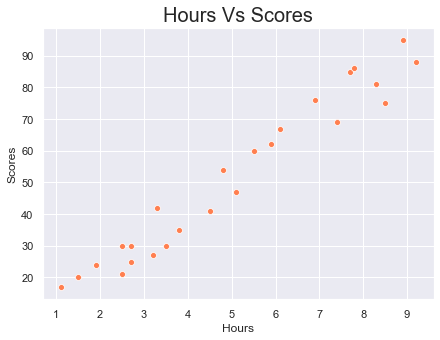

In [78]:
#Plotting distribution of scores
sns.set(style="darkgrid")
fig=plt.figure(figsize=(7,5))
plt.title("Hours Vs Scores",fontsize=20)
sns.scatterplot(x=data['Hours'],y=data['Scores'],color='coral')

### From the above graph we can see that there is a positive linear relation between the number of hours studied and percentage score.

### Preparing data

In [79]:
#Separating the target column
X=data.iloc[:, :-1].values
y=data.iloc[:,1].values

In [80]:
#Splitting the data set into train and test set
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=10)
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

(20, 1) (20,)
(5, 1) (5,)


### Training model

In [81]:
#Training model using Linear Regression
predictor=LinearRegression()
predictor.fit(Xtrain,ytrain)
print("Training complete")

Training complete


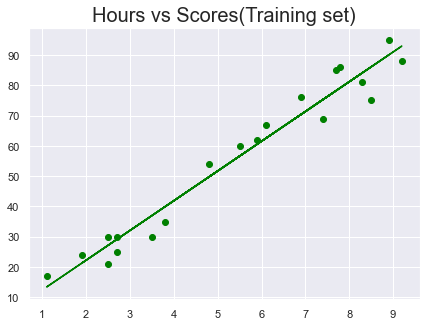

In [82]:
#Plotting the training set
fig=plt.figure(figsize=(7,5))
plt.title("Hours vs Scores(Training set)",fontsize=20)
plt.scatter(Xtrain,ytrain,color='green')
plt.plot(Xtrain,predictor.predict(Xtrain),color = "green")

The line represents the best fit line predicted by linear regression using the training data.

### Making predictions

In [83]:
#Prediction on the test set
y_pred=predictor.predict(Xtest)
list(zip(Xtest,y_pred))

[(array([1.5]), 17.37142335391534),
 (array([5.1]), 52.702922948742824),
 (array([3.3]), 35.03717315132908),
 (array([3.2]), 34.05574260702832),
 (array([4.5]), 46.81433968293825)]

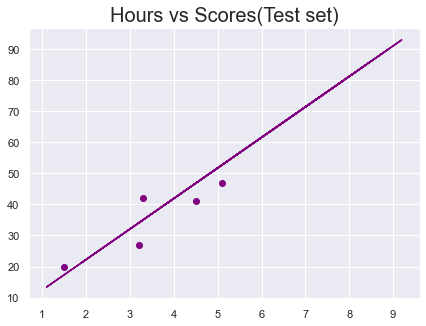

In [84]:
#Plotting test set
fig=plt.figure(figsize=(7,5))
plt.title("Hours vs Scores(Test set)",fontsize=20)
plt.scatter(Xtest,ytest,color='purple')
plt.plot(Xtrain,predictor.predict(Xtrain),color="purple")

In [85]:
#The error between actual values and predicted values
error=ytest-y_pred

In [86]:
#Actual Score vs Predicted Score
df=pd.DataFrame({'Actual': ytest, 'Predicted': y_pred, 'Error': error})  
df 

,Actual,Predicted,Error
0,20,17.371423,2.628577
1,47,52.702923,-5.702923
2,42,35.037173,6.962827
3,27,34.055743,-7.055743
4,41,46.814340,-5.814340


### Model Evaluation

In [87]:
#Evaluating how well the model performs
print('Mean squared error = ',mean_squared_error(ytest, y_pred))
print('Mean absolute error = ',mean_absolute_error(ytest, y_pred))
accuracy=predictor.score(Xtest,ytest)
print('Accuracy=',accuracy*100,'%')

Mean squared error =  34.300750550687425
Mean absolute error =  5.632881746692995
Accuracy= 66.83995499740195 %


### Predicted score of the given data

In [88]:
#Predicting on the given data
hours=np.array([9.25])
hours=hours.reshape(-1,1)
own_pred=predictor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.43229053722452


 Predicted score if a student studies for 9.25 hrs/ day is 93.43